In [1]:
# Import necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

In [5]:
newdata = pd.read_csv("data/newdata.csv")

#drop index col
newdata = newdata.drop("Unnamed: 0", axis=1)

In [6]:
# Create features and labels
X = newdata.drop('HeartDisease', axis=1)  
y = newdata['HeartDisease'] 

# Perform an 80/20 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=10)

In [7]:
# Train a DT classifier
classifier = DecisionTreeClassifier(random_state=10)  
classifier.fit(X_train, y_train) 

DecisionTreeClassifier(random_state=10)

In [8]:
# Make predictions for test data
y_pred = classifier.predict(X_test)  

In [9]:
# Calculate accuracy 
acc = accuracy_score(y_test,y_pred) * 100
print('Accuracy is :{0}'.format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy is :76.08695652173914

AUC is :0.76

Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,66,20,86
1,24,74,98
All,90,94,184


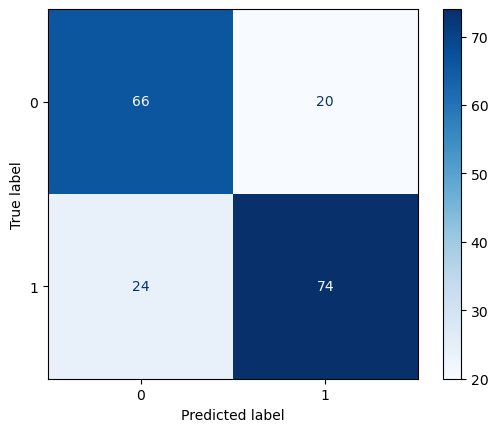

In [10]:
# Alternative confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=classifier.classes_)
disp.plot(cmap=plt.cm.Blues)

In [11]:
# Instantiate and fit a DecisionTreeClassifier
classifier_2 = DecisionTreeClassifier(random_state=10, criterion='entropy')  
classifier_2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=10)

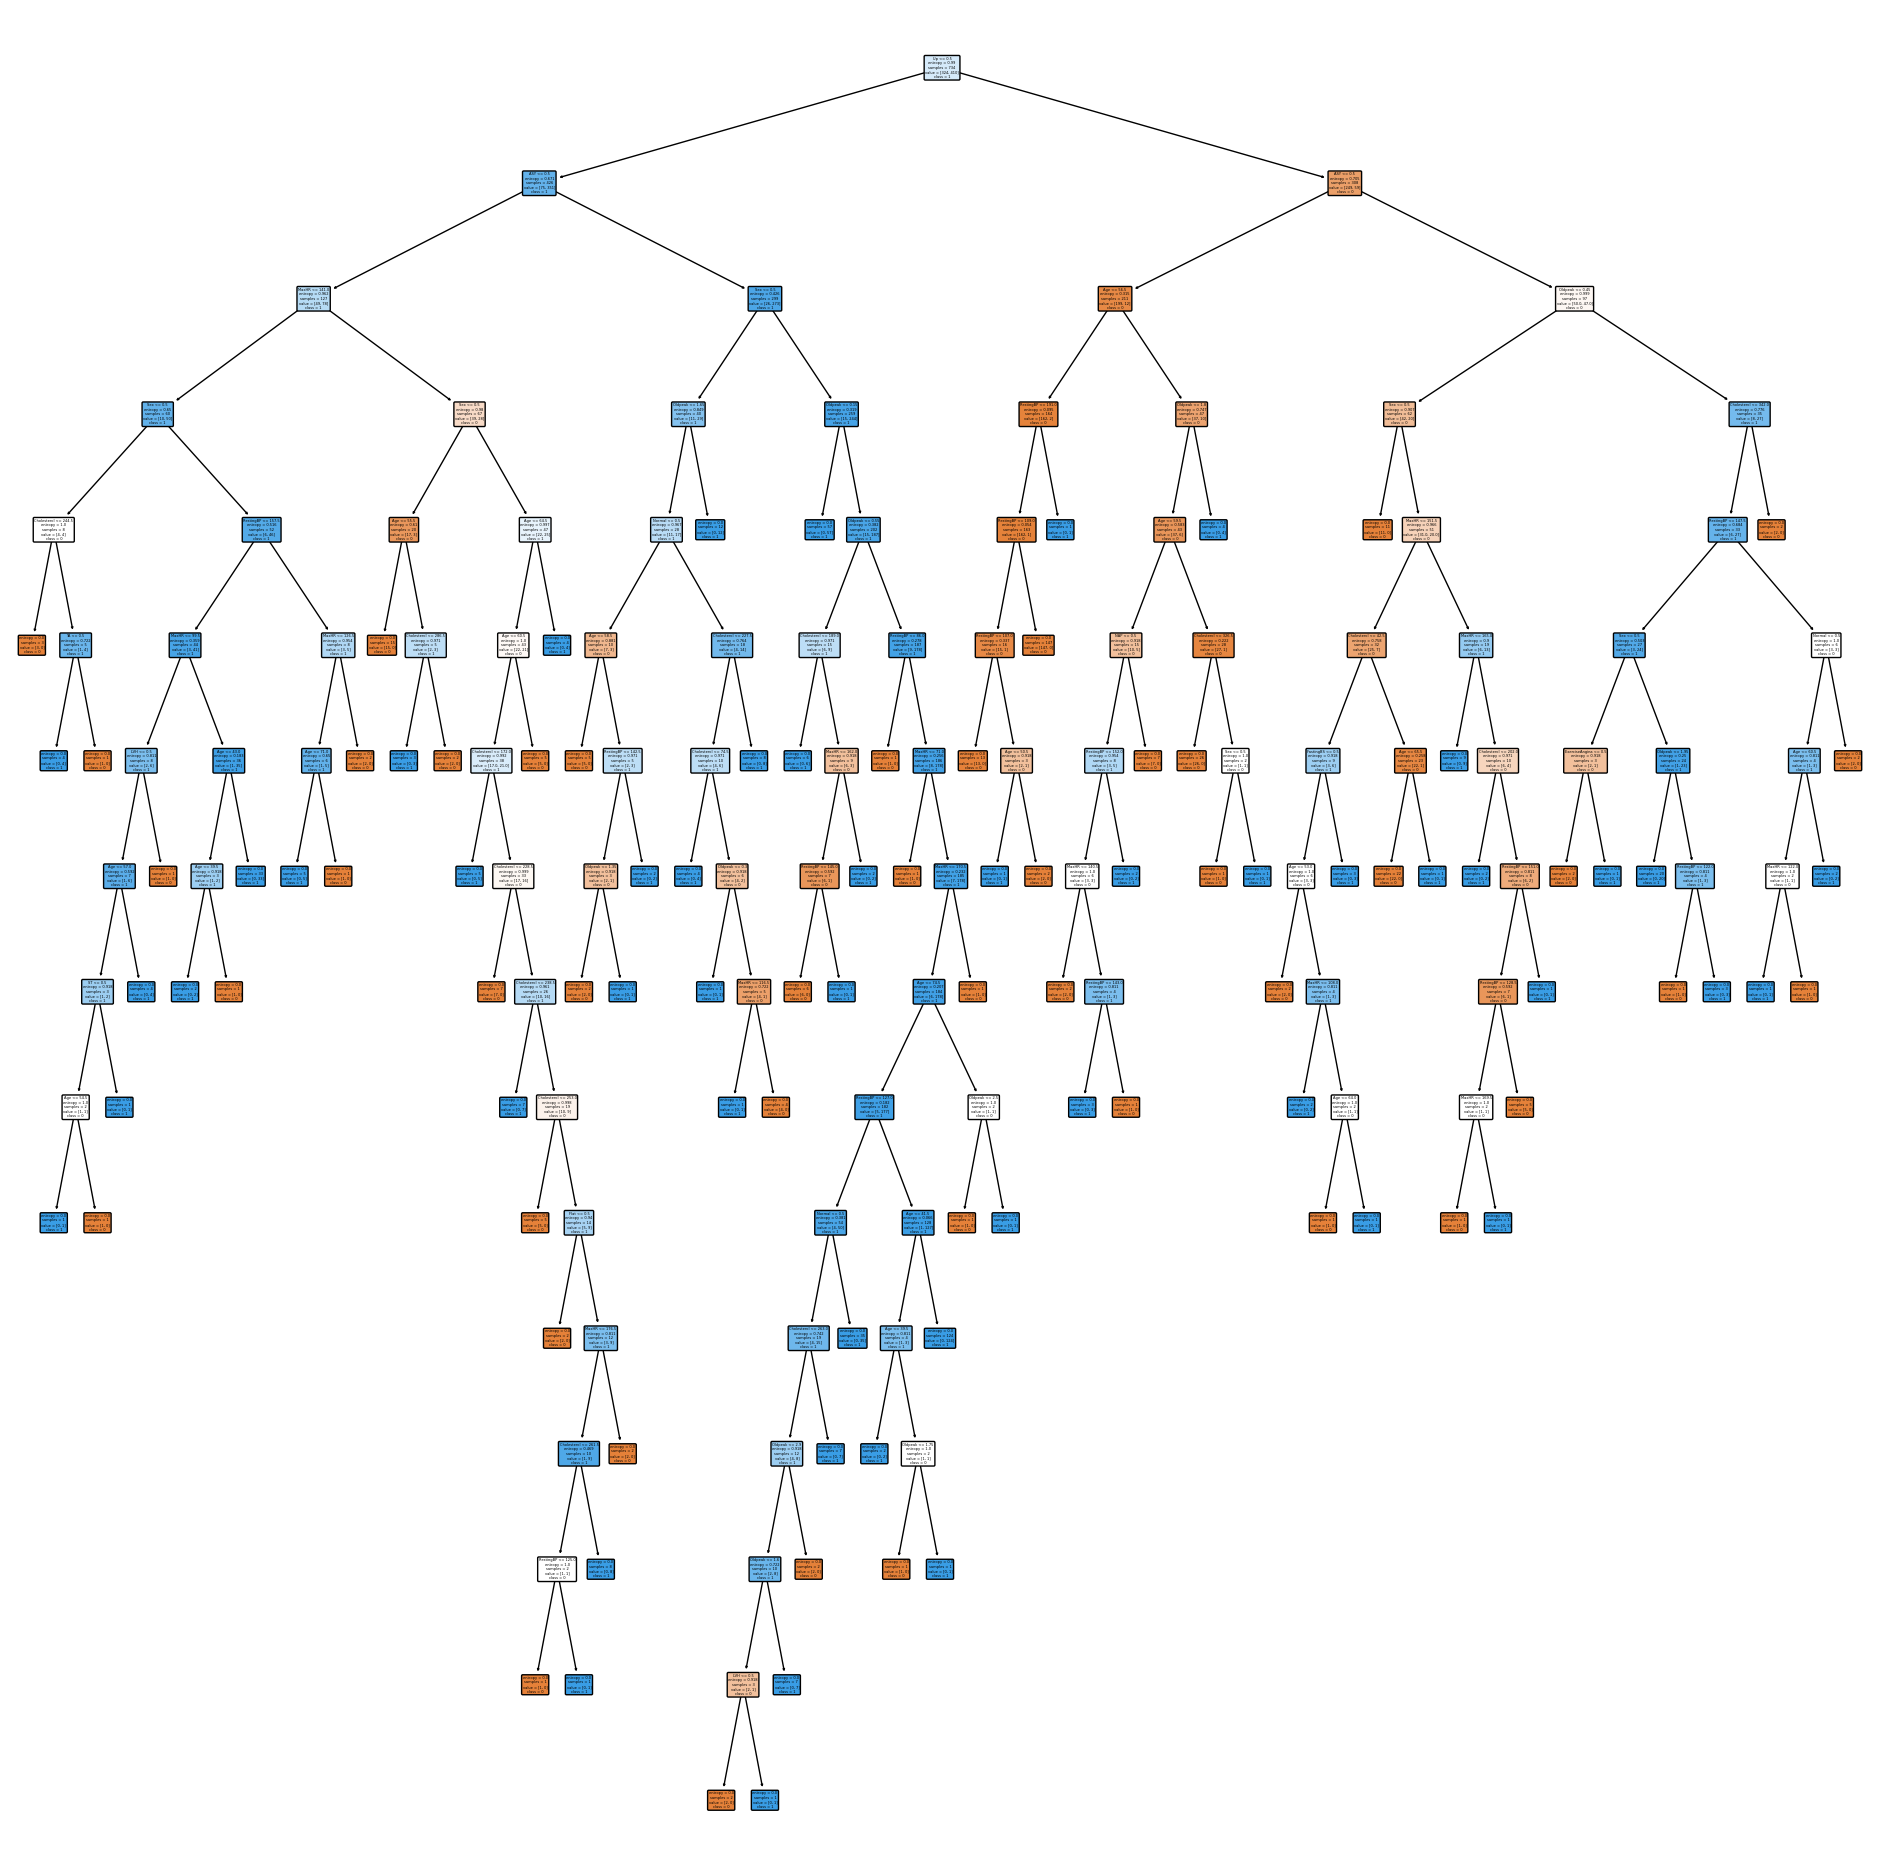

In [12]:
# Plot and show decision tree
plt.figure(figsize=(24,24), dpi=100)
tree.plot_tree(classifier_2, 
               feature_names=X.columns,
               class_names=np.unique(y).astype('str'),
               filled=True, rounded=True)
plt.show()

Text(0.5, 0, 'Score')

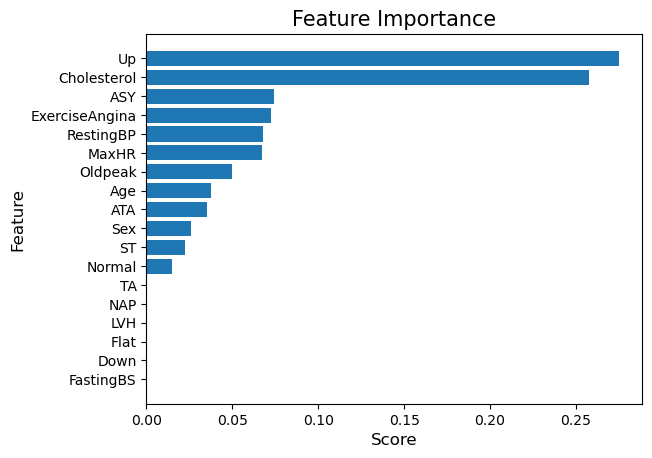

In [13]:
# decision tree for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot as plt

model = DecisionTreeClassifier(random_state = 10, criterion = "entropy")
model.fit(X_test, y_test)
# get importance
importance = model.feature_importances_

#Assigning the correct labels
x_labels = newdata.columns.values.tolist()
x_labels.remove("HeartDisease")

#Making a dictionary with labels and scores
dict_importance = {x_labels[i]: importance[i] for i in range(len(x_labels))}

#Sorted in order of importance
sorted_importance = dict(sorted(dict_importance.items(), key=lambda x: x[1]))
sorted_importance

# Horizontal Bar Chart inb Descending order of Feature Importance
plt.barh(range(len(sorted_importance)), list(sorted_importance.values()))

#Assigning Title and Axis Labels
plt.yticks(range(len(sorted_importance)), list(sorted_importance.keys()))
plt.title('Feature Importance',fontsize=15)
plt.ylabel('Feature',fontsize=12)
plt.xlabel('Score',fontsize=12)

In [15]:
#Sorted in order of importance

sorted_importance

{'FastingBS': 0.0,
 'Down': 0.0,
 'Flat': 0.0,
 'LVH': 0.0,
 'NAP': 0.0,
 'TA': 0.0,
 'Normal': 0.015018325328571145,
 'ST': 0.022578613423893033,
 'Sex': 0.026032595530844783,
 'ATA': 0.03499829399013967,
 'Age': 0.03733460416282832,
 'Oldpeak': 0.04963087329849205,
 'MaxHR': 0.06724456808914171,
 'RestingBP': 0.0675757109638582,
 'ExerciseAngina': 0.0727705816425634,
 'ASY': 0.07428807759839916,
 'Cholesterol': 0.2576464992469331,
 'Up': 0.27488125672433544}